In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn settings, research paper style, and palette
sns.set_context("paper")
sns.set_palette("husl")

In [34]:
def classification_analysis(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.1%', cmap='YlGnBu')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# QQP

In [133]:
test = pd.read_csv('data/quora-dev.csv', delimiter='\t')
test_pred = pd.read_csv('predictions/para-dev-output.csv', delimiter=r'[\s,]+', header=None, skiprows=1, engine='python')
test_pred.columns = ['index', 'id', 'prediction']
test['id'] = test['id'].transform(lambda x: x.split(' ')[1])
joint_df = pd.merge(test, test_pred, on='id')

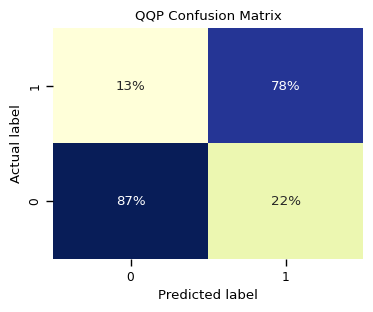

In [128]:
y_pred = joint_df['prediction']
y_test = joint_df['is_duplicate']
# classification_analysis(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, normalize='pred')
fig = plt.figure(figsize=(4, 3))
ax = sns.heatmap(cm, annot=True, fmt='.0%', cmap='YlGnBu', cbar=False)
ax.invert_yaxis()
plt.title('QQP Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.savefig("../final_report_latex/pics/qqp.png", bbox_inches='tight', dpi=300)

# SST-5

In [129]:
test = pd.read_csv('data/ids-sst-dev.csv', delimiter='\t', index_col=0)
test['sentence'] = test['sentence'].str.strip()
test_pred = pd.read_csv('predictions/sst-dev-output.csv', delimiter=r'[\s,]+', header=None, skiprows=1, engine='python')
test_pred.columns = ['id', 'prediction']
joint_df = pd.merge(test, test_pred, on='id')

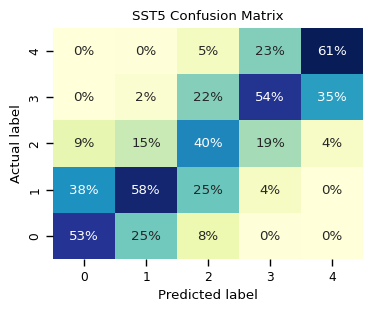

In [130]:
y_pred = joint_df['prediction']
y_test = joint_df['sentiment']
fig = plt.figure(figsize=(4, 3))

cm = confusion_matrix(y_test, y_pred, normalize='pred')
ax = sns.heatmap(cm, annot=True, fmt='.0%', cmap='YlGnBu', cbar=False)
ax.invert_yaxis()
plt.title('SST5 Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.savefig("../final_report_latex/pics/sst5.png", bbox_inches='tight', dpi=300)

# STS

In [136]:
test = pd.read_csv('data/sts-dev.csv', delimiter='\t', index_col=0)
test_pred = pd.read_csv('predictions/sts-dev-output.csv', delimiter=r'[\s,]+', header=None, skiprows=1, engine='python')
test_pred.columns = ['id', 'prediction']
joint_df = pd.merge(test, test_pred, on='id')

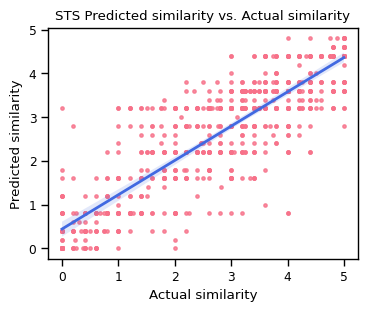

In [114]:
y_pred = joint_df['prediction']
y_test = joint_df['similarity']
fig = plt.figure(figsize=(4, 3))
sns.regplot(
    data=joint_df, x="similarity", y="prediction",
    ci=99.95, marker=".", line_kws=dict(color="royalblue", linewidth=2),
)
plt.title('STS Predicted similarity vs. Actual similarity')
plt.ylabel('Predicted similarity')
plt.xlabel('Actual similarity')
fig.savefig("../final_report_latex/pics/sts.png", bbox_inches='tight', dpi=300)